In [112]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [16]:
x = np.random.uniform(size=1000)

In [17]:
x.shape

(1000,)

In [68]:
a = 3.78
b = 8.12
sigma = .39

In [19]:
y = a * x + b + np.random.normal(size=1000, scale=sigma)

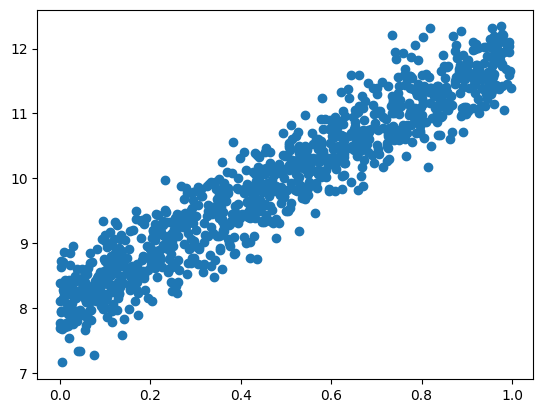

In [20]:
plt.scatter(x, y)

In [39]:
x_col = np.expand_dims(x, axis=1)
y_col = np.expand_dims(y, axis=1)
x_col.shape, y_col.shape

((1000, 1), (1000, 1))

In [56]:
# lin regression:
# beta_hat = (x^T x)^-1 * x^T * y
# y_hat = x * beta_hat
# x is design mtx: cat col of 1s to the x data (col)
design_mtx = np.hstack((np.ones(x_col.shape), x_col))
design_mtx.shape

(1000, 2)

In [53]:
beta_hat = np.linalg.inv(design_mtx.T @ design_mtx) @ design_mtx.T @ y_col

In [54]:
beta_hat.shape, beta_hat

((2, 1),
 array([[8.06541487],
        [3.88193302]]))

In [57]:
y_hat = design_mtx @ beta_hat

In [58]:
y_hat.shape

(1000, 1)

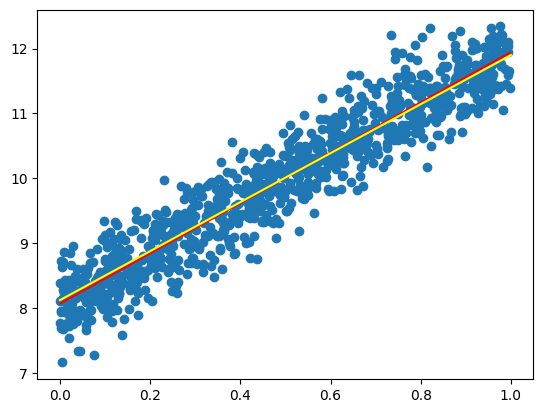

In [82]:
plt.plot(x[np.argsort(x)], y_hat[:, 0][np.argsort(x)], color='red')
plt.scatter(x, y)
plt.plot(np.linspace(0.0, 1.0, num=1000), a * np.linspace(0.0, 1.0, num=1000) + b, color='yellow')

In [94]:
# logistic curve fitting

rawdata = datasets.load_breast_cancer()

In [95]:
data = rawdata.data
target = rawdata.target

In [125]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [97]:
data.shape, target.shape

((569, 30), (569,))

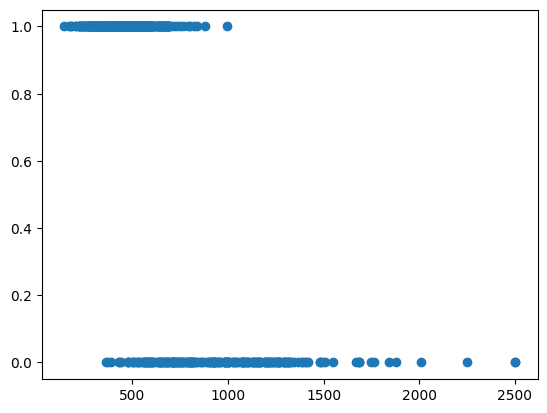

In [128]:
plt.scatter(data[:, 3], target)

In [111]:
fitted_est = LogisticRegression(verbose=1, max_iter=500, n_jobs=-1).fit(data[:, :1], target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.57284D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     19      1     0     0   2.428D-05   2.909D-01
  F =  0.29092271409790893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [113]:
scaler =  preprocessing.StandardScaler().fit(data)

In [116]:
scaler.mean_, scaler.scale_

(array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
        9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
        1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
        2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
        3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
        1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
        1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
        2.90075571e-01, 8.39458172e-02]),
 array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
        1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
        2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
        2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
        3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
        4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
        2.28123569e-02

In [117]:
data_scaled = scaler.transform(data)
data_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [130]:
fitted_est = LogisticRegression(verbose=1, max_iter=500, n_jobs=-1, penalty=None, solver='saga').fit(data_scaled[:, :1], target)

convergence after 12 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


In [134]:
preds = fitted_est.predict(data_scaled[:, :1])

In [146]:
feat0 = data_scaled[:, :1]
feat0.shape

(569, 1)

In [169]:
sort_idx = np.argsort(data[:, :1], 0)[:, 0]
# feat0 = feat0[sort_idx][:, 0, 0]
sort_idx

array([101, 539, 538, 568,  46, 151, 525, 314,  61,  59, 175, 114, 391,
       358,  71, 116, 307,  68, 318,  63, 504, 520, 553, 412, 416, 557,
       359,  66,  21, 234, 341, 470, 467, 505, 548, 192, 152, 140, 273,
       424, 459, 110,  97, 524, 103, 206, 176, 425, 338, 185, 556,  60,
       222, 217, 320, 547, 390, 345, 555, 546, 226, 245, 426, 303, 104,
       299, 113, 443, 376, 266, 248, 174, 269, 144, 166, 427, 549, 550,
       474, 159, 296, 405,  41, 534, 440, 381, 411, 342, 398, 507, 379,
       173, 551, 428, 354, 153, 419, 561, 332, 232, 333, 288, 522, 388,
       380, 139, 271, 242,  67, 231, 276, 515, 109, 410, 289, 183, 120,
         3, 137, 142,  80, 304, 348, 478, 251, 559, 249,  55, 540, 313,
       420, 463, 305,  98, 422, 469, 456, 106, 350, 531, 488, 537, 310,
       344, 187, 136, 281, 510, 530, 160,  50, 297, 146, 399, 188,  31,
       211, 293, 450, 216, 415, 275, 145, 401, 115, 286,  52, 349, 445,
        84, 452, 327, 471,  48, 382, 158, 346, 529, 394, 480,  9

In [141]:
probs = fitted_est.predict_proba(data_scaled[:, :1])

In [161]:
probs

array([[9.66051588e-01, 3.39484122e-02],
       [9.97564239e-01, 2.43576087e-03],
       [9.93973184e-01, 6.02681627e-03],
       ...,
       [8.71207126e-01, 1.28792874e-01],
       [9.97638432e-01, 2.36156756e-03],
       [7.27382887e-04, 9.99272617e-01]])

In [179]:
xlabel = rawdata.feature_names[0]
ylabel = rawdata.target_names[0] + "=0 or " + rawdata.target_names[1] + "=1"
ylabel

'malignant=0 or benign=1'

Text(0, 0.5, 'malignant=0 or benign=1')

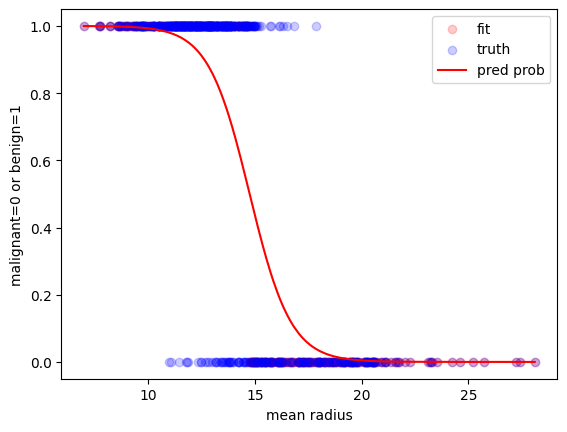

In [181]:
plt.scatter(data[:, :1], preds, label='fit', color='red', alpha=.2)
plt.scatter(data[:, :1], target, label='truth', color='blue', alpha=.2)
plt.plot(data[:, :1][sort_idx], probs[sort_idx, 1], label='pred prob', color='red')
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)